# Week 05 (Monday), AST 8581 / PHYS 8581 / CSCI 8581 / STAT 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


Based on notebooks available here: https://github.com/markjay4k/fourier-transform; and with contributions totally ripped off from Ashish Mahabal, Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)

# Where are we headed?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> <b> Analysis of Time series (periodicity) </b> -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

# Last Class: Fourier Series and Fourier Transform

The Fourier Transform by itself can be powerful if 
1. the signal-to-noise is high
2. the signal is continious and uniformly sampled 
3. the shape you are modeling is simple and can be decomposed into a few Fourier terms.

# Today: Periodicity in non-uniformly sampled data (Lomb-Scargle)

Unfortunately, these are not the usual conditions we have when taking data. We will look at this case next time.

This is the kind of data that you **want** to have, whereas the figure on the right is the kind of data that you are more likely to actually have.

<img src="figures/rrlyrae-good.png" width=400>


Whereas this is the kind of data that you are more likely to actually have.

<img src="figures/rrlyrae-bad.png" width=400>

### Properties of light-curves
* Gappy
* Irregular
* Heteroskedastic (the variance tends to vary with source brightness, for example)

### Reasons
* expense, rotation/revolution of Earth, moon
* science objectives, weather, moon
* weather, moon, airmass

## What can we do with light-curves?
* Abstract them through generic statistical measures
* Use domain knowledge to look for characteristics
* See if they are periodic

## Statistical Features

* Compute features (statistical measures) for each light curve: amplitudes, moments, periodicity, etc.
* Converts heterogeneous light curves into homogeneous feature vectors in the parameter space
* Apply a variety of automated classification methods

# The Periodogram

What we want to be able to do is to detect variability and measure the period in the face of both noisy and incomplete data. Instead we'll use Fourier decomposition to get a more useful tool for actual data analysis.


For a periodic signal we have:

$$y(t+P)=y(t),$$ where $P$ is the period.

We can create a *phased light curve* that plots the data as function of phase:
$$\phi=\frac{t}{P} − {\rm int}\left(\frac{t}{P}\right),$$

where ${\rm int}(x)$ returns the integer part of $x$.

### A Single Sinusoid

Let's take the case where the data are drawn from a single sinusoidal signal:

### $$y(t)=A \sin(\omega t+\phi)+\epsilon$$

and determine whether or not the data are indeed consistent with periodic variability and, if so, what is the period.


This model is annoying to work with because it's **non-linear** in the frequency term, $\omega$ and the phase, $\phi$

We can rewrite the argument as $\omega(t−t_0)$ (reexpressing the phase term) and use trig identies to rewrite the model as: 

### $$y(t)=a \sin(\omega t)+b \cos(\omega t)$$

where 

### $$A=(a^2+b^2)^{1/2} \text{ and } \phi=\tan^{−1}(b/a)$$

The model is now linear with respect to coefficients $a$ and $b$ (and nonlinear only with respect to frequency, $\omega$). So we got rid of one of the two non-linear parameters!

It turns out, if we know the noise $\sigma$ then 

### $$   p(\omega|\{t,y\}, \sigma) \propto \exp \left( { P(\omega) \over \sigma^2} \right)$$

giving us the posterior for $\omega$! 

$P(\omega)$ is the [periodogram](https://en.wikipedia.org/wiki/Periodogram), which is just a plot of the "power" at each possible period

So the process is similar to what we did with maximum likelihood estimation
1. Get some data
2. Make a uniform grid in period
3. Evaluate the likelihood/the periodogram power at each period 
4. Identify the period with the maximum power

<img src="figures/periodogram.png" width=400>

### Significance of the peaks in the periodogram

The amplitude(s) of the periodic signal can be derived from the posterior in much the same way as we do for MLE i.e. take the derivative of the posterior with respect to $a$ and $b$, equate to 0 and find where the maximum is.

But what we really want to know is the "best value" $\omega$? 

The $\chi^2$ is given by
$$\chi^2(\omega) \equiv {1 \over \sigma^2} \sum_{j=1}^N [y_j-y(t_j)]^2 =
  {1 \over \sigma^2} \sum_{j=1}^N [y_j- a_0\, \sin(\omega t_j) - b_0 \, \cos(\omega t_j)]^2$$
  
which we can simplify to

$$\chi^2(\omega) =  \chi_0^2 \, \left[1 - {2 \over N \, V}  \, P(\omega) \right]$$

where, again, $P(\omega)$ is the periodogram and $\chi_0^2$ is the $\chi^2$ for a model with $y(t)$=constant:

$$  \chi_0^2 = {1 \over \sigma^2} \sum_{j=1}^N y_j^2 = {N \, V \over \sigma^2}$$

We'll now renormalise the periodogram, defining the [Lomb-Scargle periodogram](https://en.wikipedia.org/wiki/Least-squares_spectral_analysis#The_Lomb.E2.80.93Scargle_periodogram) as

$$P_{\rm LS}(\omega) = \frac{2}{N V} P(\omega),$$  where $0 \le P_{\rm LS}(\omega) \le 1$.

With this renormalization, the reduction in $\chi^2(\omega)$ for the harmonic model, 
relative to $\chi^2$ for the pure noise model, $\chi^2_0$ is
$${\chi^2(\omega) \over \chi^2_0}=  1 - P_{LS}(\omega).$$

To determine if our source is variable or not, we first compute $P_{\rm LS}(\omega)$ and then model the odds ratio for our variability model vs. a no-variability model.

If our variability model is "correct", then the peak of $P(\omega)$ [found by grid search] gives the best $\omega$ and the $\chi^2$ at $\omega = \omega_0$ is $N$.

If the true frequency is $\omega_0$ then the maximum peak in the periodogram should have a height

$$P(\omega_0) = {N \over 4} (a_0^2 + b_0^2)$$

and standard deviation
$$      \sigma_P(\omega_0)  = {\sqrt{2} \over 2} \, \sigma^2.$$


# Properties of LS and the periodogram

- The expected heights of the peaks in a periodogram don't depend on $\sigma$ but their variation in height do.
- For $P_{\rm LS}(\omega_0)$, with no noise the peak approaches 1. As noise increases, $P_{\rm LS}(\omega_0)$ decreases and is ``buried'' in the background  noise.
- Our derivation worked for mean = 0, and data in a single channel/passband
    - Extensions of Lomb-Scargle to multiple passbands and to handle a floating mean + many numerical approximations
    
## [Jake VanDerPlas has a good writeup on understanding the periodogram](https://arxiv.org/abs/1703.09824)

# What the periodogram is good for and what it isn't

Pros:
- Works with unevenly sampled data, and binning in phase helps build statistics even with noisy data

Cons:
- ANY PERIODIC SIGNAL IN THE DATA WILL EXHIBIT SOME POWER
    - This includes aliases of the true period
- Multiband extension requires  that the period/frequency is the same across all channels/passbands 
    - this is not the case for many time-series phenomena

# In-class warm-up: Finding the Period of a Variable Star

If you don't already have gatspy, you'll want it. There are alternatives but it is one of the best for CPU-based Lomb-Scargle.

There is some data in a file below.

1. Plot it up to see what it looks like
2. Use the Lomb-Scargle Multiband to construct a periodogram on a grid of a 1000 periods
3. Plot the folded light curve for the best-guess period

In [1]:
# RUN THIS
%matplotlib inline
import astropy.table as at
import matplotlib.pyplot as plt
import numpy as np
from gatspy.periodic import LombScargleMultiband

data = at.Table.read('data/1938779.dat', format='ascii')

t     = data['HJD']
y     = data['MAG']
dy    = data['MAGERR']
filts = data['FILTS']

data

HJD,MAG,MAGERR,CONTAM,SKYLO,SKYHI,BLIM,TYPE,CHIP,XP,YP,FILTS
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1
56423.713908,19.136,0.02,0.0,22.19,30.6,0.088,1.0,4.0,163.44,1993.44,u
56423.862091,19.07,0.016,0.0,22.93,31.95,0.085,1.0,4.0,70.75,2060.01,u
56424.694922,19.209,0.021,0.0,19.38,28.98,0.089,1.0,4.0,147.53,2012.44,u
56424.77499,18.982,0.019,0.0,42.83,68.57,0.089,1.0,4.0,116.54,2031.77,u
56424.86045,19.054,0.015,0.0,39.22,57.04,0.079,1.0,4.0,132.58,2006.13,u
56450.659293,19.255,0.017,0.0,18.3,26.51,0.087,1.0,4.0,250.52,1937.43,u
56450.785196,18.935,0.017,0.0,21.16,30.51,0.082,1.0,4.0,193.17,1973.04,u
56450.883668,19.197,0.019,0.0,26.06,35.37,0.087,1.0,4.0,203.26,1970.1,u
56450.936075,19.248,0.022,0.0,46.57,56.34,0.096,1.0,4.0,206.95,1993.73,u


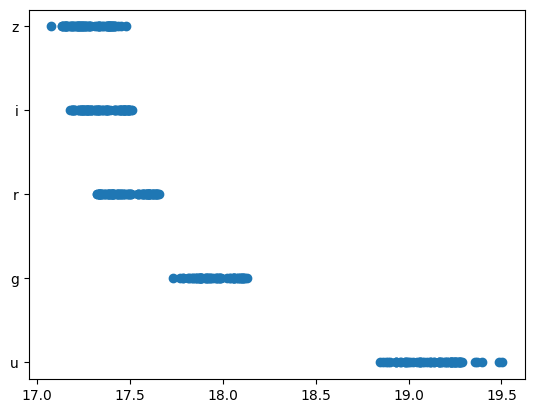

In [2]:
# PLOT THE DATA IN EACH PASSBAND - YOUR CODE HERE
plt.scatter(y,filts)

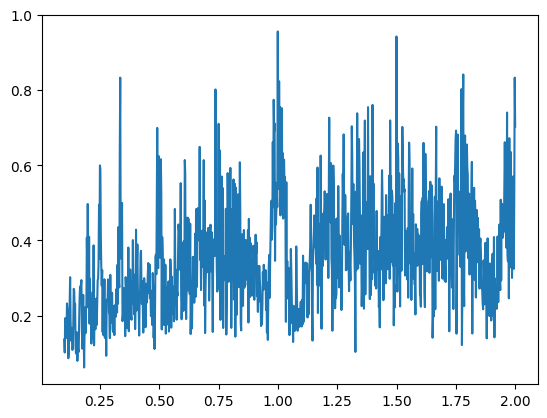

In [3]:
# You can set the number of terms in the Lomb-Scargle periodogram, either baseline or by band
model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy, filts)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 2 days 
periods = np.linspace(0.1, 2, 1000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)

In [4]:
# YOU CAN SET THE RANGE FOR THE PERIOD SEARCH TO NARROW THINGS DOWN
model.optimizer.period_range = (0.2, 0.8) # Skipping period of 1 because of sampling bias

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
period = model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.00906
 - Using 5 steps per peak; omega_step = 0.00181
 - User-specified period range:  0.2 to 0.8
 - Computing periods at 12999 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


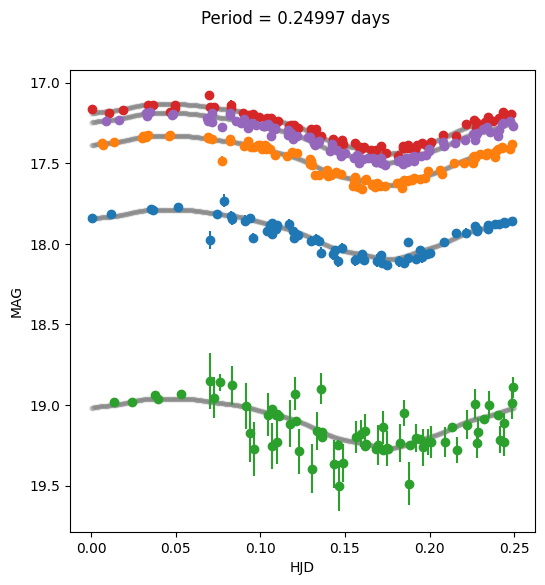

In [5]:
# RUN THIS TO LOOK AT YOUR FOLDED LIGHT CURVE
tfit = np.linspace(0, period, 1000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
for pb in set(filts):
    pfilt = [pb,]*len(tfit)
    yfit = model.predict(tfit, filts=pfilt)
    ax.plot(tfit, yfit, linestyle='-', marker='.', color='grey', alpha=0.1)
    ind = (filts == pb)
    ax.errorbar(t[ind]%period, y[ind], yerr=dy[ind], linestyle='None', marker='o')
ax.set_xlabel('HJD')  
ax.set_ylabel('MAG')
fig.suptitle(f'Period = {period:.5f} days')
ax.invert_yaxis()

# In-Class Exercise: Period analysis of a Synthetic Lightcurve

First, we need to generate a lightcurve to work with. The function below generates a series of timestamps t, and a sinusoidal signal y with noise dy added to it. We will use this lightcurve to test our functions. Note that our y values are generated with a sin function with a frequency of 2pi, or equiaveletly, a period of 1.

In [6]:
import numpy as np
from astropy.stats import LombScargle
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [7]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data')

Text(0, 0.5, 'Flux')

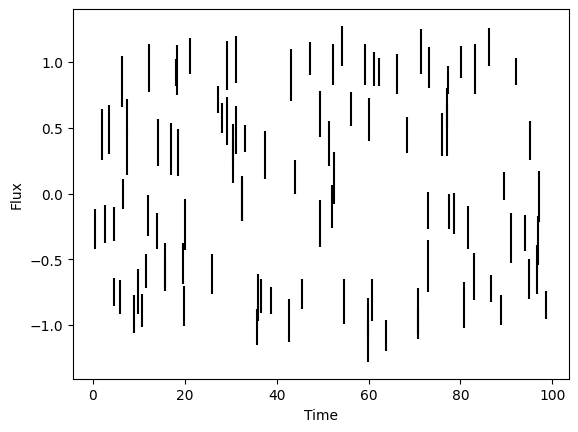

In [8]:
# "Generates a sample lightcurve with times t, magnitudes y, and errors dy

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

plt.errorbar(t,y,dy,ls='none',c='k')
plt.xlabel('Time')
plt.ylabel('Flux')


As you can see, this lightcurve is not very interesting when we plot it. This is where we need to use period finding analysis to learn more. Below, we try plotting the function in a new way--phase folding it. When we do this, we assume a period, and compute what phase each timestamps corresponds to between 0 and 1, assuming that period. Below, we try folding our lightcurve with the period equal to 1.

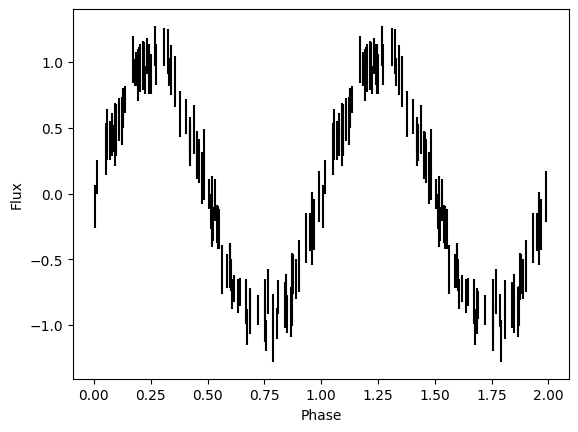

In [9]:
# "this function takes times t, mags y, and errors dy, and a period and phase folds the lightcurve at this period

def phase_fold(t,y,dy,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    dy=np.concatenate((dy,dy))
    plt.errorbar(phases,y,dy,ls='none',c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    
phase_fold(t,y,dy,1)

Phase-folding can be used as a rudimentary method of period determination.  One may make educated guesses about the period of the phenomenon and phase-fold the lightcurve to see if a repeating pattern emerges.  Try this for this observations of the asteroid 1856 Ruzena, observed by non-Astronomy majors from the University of Maryland in April 2018 along with collaborators in Malta.  Asteroids typically have rotation periods between 2 and 12 hours.

The code below plots the raw, or unphased lightcurve, for all four nights of observations of the asteroid.

Text(0, 0.5, 'Differential Magnitude')

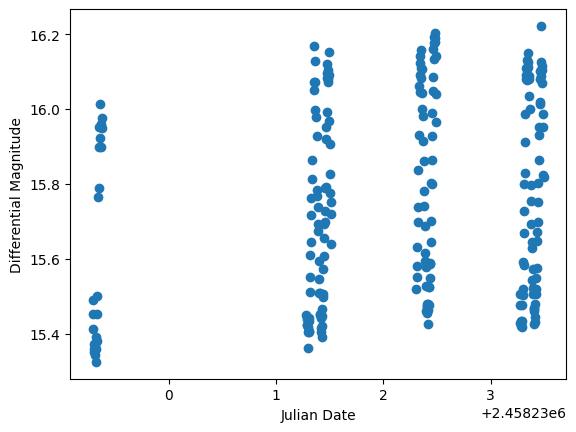

In [10]:
data=np.loadtxt(os.path.join(data_dir,'asteroid1.csv'),delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
plt.plot(t,y,ls='none',marker="o")
plt.xlabel('Julian Date')
plt.ylabel('Differential Magnitude')


Why does the plot above show four vertical strings of points?  Each vertical "string" of points is one night of observations.  Compared to the entire period of time along the x-axis, each night is a very small length of time.  If you alter the code in the cell and change the limits on the x axis, you, can view each night of data individually.  (This will help you get an idea of the length of the asteroid's rotation period, so this is an especially useful exercise.)

It's not unusual for astronomers to have large gaps in lightcurves due to daytime and longer periods of time when observations were not able to be made (i.e., weather, length of observing cycles).  Phase-folding, or phasing, the lightcurve to trial periods allows one to remove these gaps and visualize the data more easily.

Below, you will try phasing the data for 1856 Ruzena to trial periods to see if you can determine the asteroid's rotation period by the trial-and error method.  Don't spend more than 5 minutes trying different test periods - you could do this all day and never get lucky with the correct period, since you'll need several decimal places of precision.  (The students from the class published the rotation periods to 4 decimal places of precision using only these data.)

Also, consider carefully:  when you have correctly determined the asteroid's rotation period and have a phased lightcurve, how many maxima and minima should it have in one complete phase?

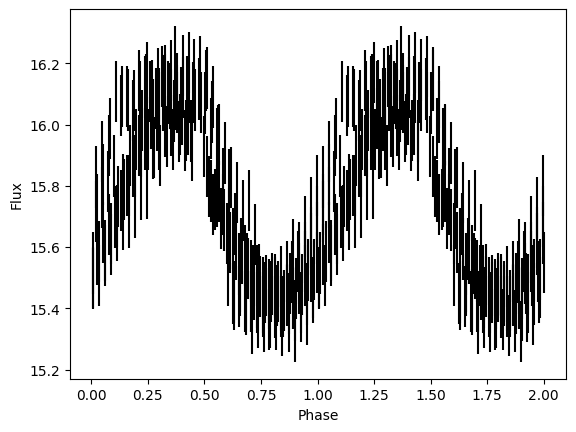

In [11]:
# create a dy array with error bars of 0.1 to pass to your phase fold function
dy = 0.1*np.ones(y.shape)
#period in units of days
period=.1106
phase_fold(t,y,dy,period)

From your experience with the trial-and-error method above, you can see that a better method of finding test periods is needed.  This is where the Lomb-Scargle Periodogram method is used.  This method essentially measures how much power is present at each frequency within the data: more power at a certain frequency should indicate a repeating signal within the data.  However, that signal could be from a physical phenomenon, such as a pulsating star or rotating asteroid, or it could be an artifact, such as the day/night cycle or other artificial frequencies caused by the observing process.  The astronomer must interpret the data to make a final decision.

In this case, we know that the period is 1 day; usually one does not know this ahead of time, and so we will use the LS Periodogram to tell us this.

Use the LombScargleMultiband function to compute the power spectrum (which shows us the relative strength of signals at different frequencies (frequency = 1/period).  You should see a large spike at period = 1.  Try changing the value of the period and watch the periodogram (the power spectrum graph) change.

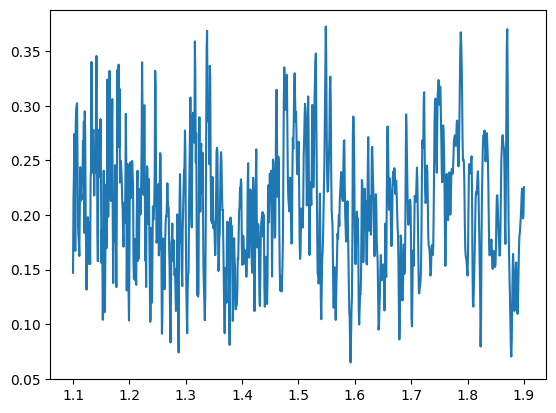

In [12]:
period=1

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi /period* t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

# YOUR CODE HERE
model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 2 days 
periods = np.linspace(1.1, 1.9, 1000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)

Now determine the frequency with the most power to find the best period to represent the signal in the data. Use your phase-folding code to plot the phase-folded data with the best period.

In [13]:
# YOUR CODE HERE
model.optimizer.period_range = (1.1, 1.9) # Skipping period of 1 because of sampling bias

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
period = model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.064
 - Using 5 steps per peak; omega_step = 0.0128
 - User-specified period range:  1.1 to 1.9
 - Computing periods at 189 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


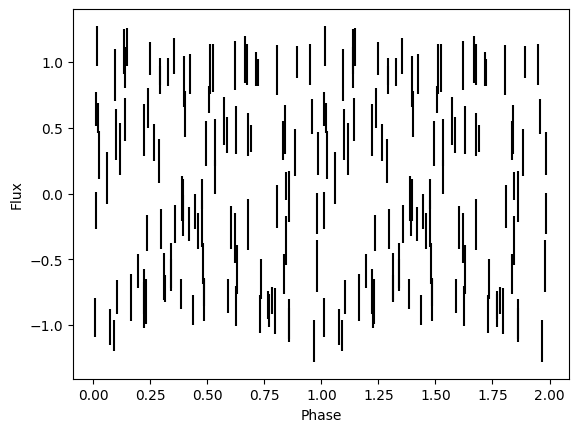

In [14]:
phase_fold(t,y,dy,period)

In [15]:
period

1.8702359966287394

# In-Class Exercise: Period analysis of a real Lightcurve

Let us apply the Lomb-Scargle Periodogram to real data.  First, let's take a look at unphased Cepheid data using the code below. (These data are from the American Association of Variable Star Observers.)   Please fill in the code block below to plot the unphased data. Notice how these data span a very long time period.  You may alter the code block in order to examine shorter time periods.  Do you have an educated guess about the period of this Cepheid?

Text(0, 0.5, 'V Magnitude')

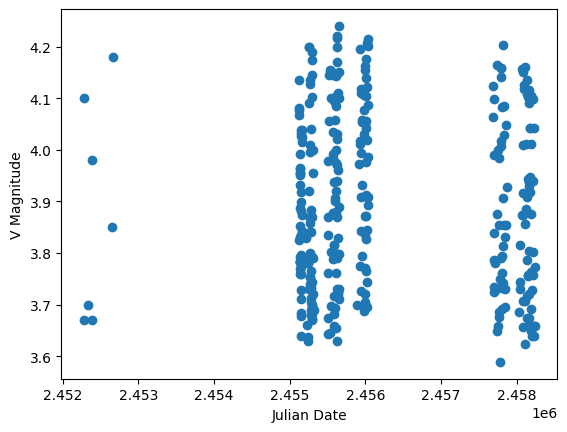

In [23]:
data=np.loadtxt(os.path.join(data_dir,'cepheid.csv'),delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
plt.plot(t,y,ls='none', marker="o")
plt.xlabel('Julian Date')
plt.ylabel('V Magnitude')

Now apply your LS algorithm to the Cepheid data.  

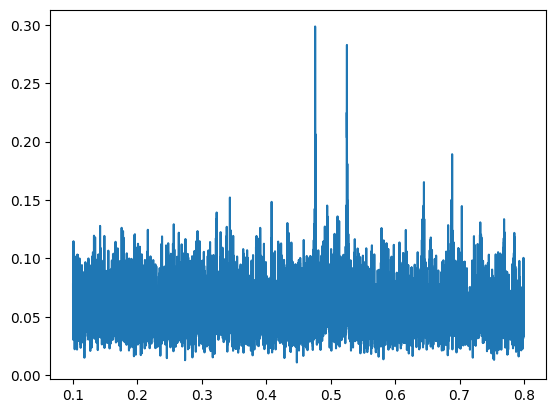

In [24]:
# Assume sensible error bars for data
dy = 0.1 * np.ones(y.shape)

# YOUR CODE HERE

model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 2 days 
periods = np.linspace(.1, .8, 10000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)

##model.optimizer.period_range = (0, 0.01) # Skipping period of 1 because of sampling bias

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
#period = model.best_period
#phase_fold(t,y,dy,period)

In [25]:
model.optimizer.period_range = (.1,.8) # Skipping period of 1 because of sampling bias

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
period = model.best_period
#phase_fold(t,y,dy,period)

Finding optimal frequency:
 - Estimated peak width = 0.00105
 - Using 5 steps per peak; omega_step = 0.000211
 - User-specified period range:  0.1 to 0.8
 - Computing periods at 260752 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


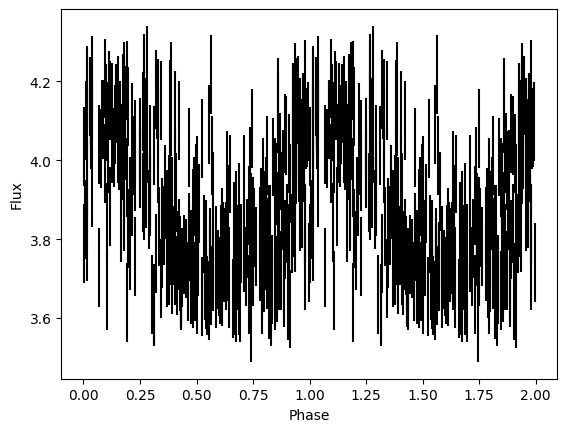

In [27]:
phase_fold(t,y,dy,period)

In [26]:
period

0.5251233063185283

# In-Class Exercise: Lomb-Scargle Performance

Since Lomb-Scargle is one of the main time series analysis techniques in astronomy, we want to assess its performance as a function of signal-to-noise, time series sampling, and waveform shape. It is often worth investigating the performance of algorithms in terms of toy data sets to get an understanding of what the limitations may be. So:

1) Write a routine to generate a periodic sinusoidal time series at a period of $per$, containing $n$ datapoints, assuming homoscedastic Gaussian errors given by a standard deviation sigma, with a mean sample time of $meandt$ and standard deviation of $stddt$.

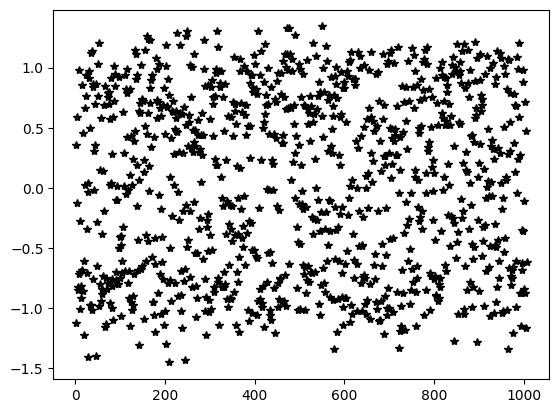

In [28]:
def getTimeSeries(per, n, sigma, meandt, stddt):
    # YOUR CODE HERE
    # Generate time points with a mean sample time and standard deviation
    t = np.cumsum(np.random.normal(meandt, stddt, n))

    # Generate sinusoidal signal with periodicity
    y = np.sin(2 * np.pi * t / per)

    # Add homoscedastic Gaussian errors
    y += np.random.normal(0, sigma, n)
    return t, y
    
t, y = getTimeSeries(0.1, 1000, 0.2, 1.0, 0.2)

plt.plot(t, y, 'k*')

2) Apply LombScargle to recover the period and then plot the corresponding periodogram, and the phase folded time series.

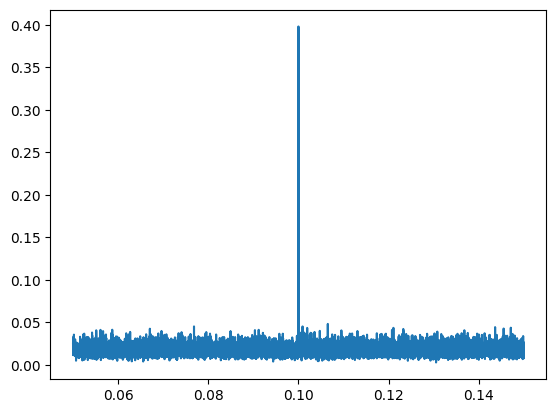

In [35]:
# YOUR CODE HERE
dy = 0.1 * np.ones(y.shape)
model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 2 days 
periods = np.linspace(.05, .15, 10000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)

In [31]:
model.optimizer.period_range = (.01,.2) # Skipping period of 1 because of sampling bias

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
period = model.best_period
#phase_fold(t,y,dy,period)

Finding optimal frequency:
 - Estimated peak width = 0.00625
 - Using 5 steps per peak; omega_step = 0.00125
 - User-specified period range:  0.1 to 0.8
 - Computing periods at 43999 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


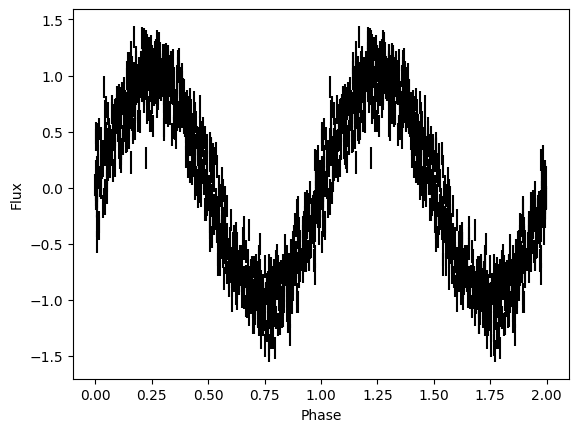

In [32]:
phase_fold(t,y,dy,period)

In [33]:
period

0.09999990491366204

3) For a range of periods extending over three decades, e.g., $\log_{10}(per) = -1 - 2$, generate 10 time series and determine how accurate (how many period found by Lomb-Scargle are within 1\% of the known periods) Lomb-Scargle are.

You might consider repeating this test as (a) a function of number of data points in the time series, i.e., plot LS accuracy againts $n$, (b) a range of error values ($sigma$), and (c) different sample times.

In [ ]:
# YOUR CODE HERE

# How do check if the object is even variable?

When dealing with time series data, the first thing that we want to know is if the system that we are studying is even variable (otherwise, there is no point doing time series analysis!).  

In the context of frequentist statistics, this is a question of whether our data would have been obtained by chance if the no-variability null hypothesis were correct.

If we find that our source *is* variable, then our time-series analysis has two main goals:
1. Characterize the temporal correlation between different values of $y$ (i.e., characterize the "light curve").  For example by learning the parameters for a model.
2. Predict future values of $y$.

If the errors are known and Gaussian, we can simply compute $\chi^2$ and the corresponding $p$ values for variation in a signal.

For a sinusoidal variable signal

### $$y(t) = A \sin(\omega t)$$

with constant errors, $\sigma$, then variance is 

### $$V = \sigma^2 + A^2/2$$

## If $A=0$ (no variability)
* ### $\chi^2_{\rm dof}=\frac{1}{N} \sum_j \left(\frac{y_j}{\sigma}\right)^2 \sim V/\sigma^2$
* ### $\chi^2_{\rm dof}$ has  expectation value of 1 and std dev  of $\sqrt\frac{2}{N}$

## If $|A|>0$ (variability)
* ### $\chi^2_{\rm dof}$ will be larger
than 1. 
* ### probability that $\chi^2_{\rm dof}>1 + 3 \sqrt{2/N}$  is about 1 in 1000 (i.e., $>3\sigma$ above 1)

If this **false-positive rate** is acceptable (even without variability, 1 times in 1000 we will observer a $\chi^2_{\rm dof}$ above this threshold) then the **minimum detectable amplitude** is:

### $$A > \left( \frac{72}{N} \right)^\frac{1}{4} \sigma \approx 2.9 \sigma N^{-{1 \over 4}}$$

which follows from equating $V/\sigma^2=1 + 3 \sqrt{2/N}$, expanding $V$, and solving for $A$.

It takes $N > 70$ to reach $A=\sigma$.

For $N=100$ data points, the minimum detectable amplitude is $A=0.92\sigma$

For $N=1000$, $A = 0.52\sigma$ 

That is, **if we have enough observations, we can actually detect variability whose amplitude is smaller than the uncertainty in the measurements.**


Note that this is the best that we can do under the assumption of the null hypothesis of no variability.  

If instead we know the model (not limited to periodic variability), then we can perform a [**"matched filter"**](https://en.wikipedia.org/wiki/Matched_filter) analysis and improve upon this (i.e., we can positively identify lower-amplitude variability).  

**Indeed in a Bayesian analysis, we must specify a model.**

For non-periodic variability, the system can either be **stochastic** (like the stock market) or **temporally localized** (such as a flare/burst).

## Parameter Estimation, Model Selection, and Classification

Time series analysis can be conducted in either the time domain or the frequency domain. We'll use all the same machinery we worked with in the first half of class. 

We can fit a model to $N$ data points $(t_i,y_i)$:

### $$y_i(t_i) = \sum_{m=1}^M \beta_m T_m(t_i|\theta_m) + \epsilon_i,$$

where the functions, $T_m$, do not need to be periodic, $t_i$ does not need to be evenly sampled and $\theta_m$ are the model parameters.

So, for example, if we have

### $$y_i(t_i) = a \sin(\omega_0 t_i) + b \cos (\omega_1 t_i),$$

then $a=\beta_0$, $b=\beta_1$, $\omega_0=\theta_0$, and $\omega_1 = \theta_1$.

Determining if you have the right model can also use the same machinery as we've used (posterior predictive checks, information criterion):

Common deterministic models include

### $$T(t) = \sin(\omega t)$$

and

### $$T(t) = \exp(-\alpha t),$$

where the frequency, $\omega$, and decay rate, $\alpha$, are parameters to be estimated from the data.

You might also consider a "chirp" signal with

### $$T(t) = \sin(\phi + \omega t + \alpha t^2).$$

(another way of thinking of a chirp is that the *frequency varies with time*; $\omega_{\rm instantaneous} = \omega + \alpha t$)

## Temporally Localized Signals ($\S$ 10.4)

Let's begin with the case of a stationary signal with an event localized in time.
An example would be the signature of a [gravitational wave from LIGO](https://www.ligo.caltech.edu/news/ligo20160615).


<table>
    <tr>
            <td><img src="figures/small_multiples.png" width=400></td>
    </tr>
</table>

In this case we know the expected shape of the signal and the noise properties are understood, so we can do what is called *forward modeling*.  Specifically, we will identify the signal by using a **matched filter** (with MCMC to search for the parameter covariances).

Even if we didn't know the shape of the distribution, we could use a non-parametric form to perform matched filter analysis.  Furthermore, for complex signals we can marginalize over "nuisance" parameters (e.g. start time or phase) that are not important for our model.

# Modeling a time-series when we have a forward model

In the first half of this class, we were able to write down a nice parametric model for our observations

However, precisely because time is an exogenous variable - just a counter that we happen to record along with our measurements - we can't usually do that anymore. 

A notable exception is for periodic phenomena, where while the time stamp is not important, there are characteristic time-scale that we can use to build a model

### The best example of this is radial velocity experiments used to detect exoplanets


<table>
    <tr>
            <td><img src="figures/Radial-Velocity-Method-star-orbits.png" width=400></td>
    </tr>
</table>

Here, the behavior of the system is governed by Kepler's laws and there is a honest-to-goodness parametric model to describe the observations. 

You can write down simple models to describe the milk production of cows, and while it is true that any cows you launch will also obey Kepler's laws, there's no fundamental physics that governs their milk production (which is likely to cease in short order if you do actually test bovine adherence to Kepler's laws). 

While the radial velocity method is expensive, because we can build very high resolution spectrographs (remember these are just devices that are mapping energy differences into angular separation), they're likely our best hope for finding an Earth-like exoplanet. 

# In Class Exercise - Looking for planets

In [38]:
# RUN THIS
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set() #nice plot formatting
import pandas as pd
import corner
from collections import namedtuple
from scipy import optimize
from gatspy.periodic import LombScargleFast
import emcee

In [41]:
# RUN THIS
data = pd.read_csv('data/47UrsaeMajoris.txt', delim_whitespace=True)
t, rv, rv_err = data.values.T

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_98280/878436730.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('data/47UrsaeMajoris.txt', delim_whitespace=True)


In [37]:
pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 7.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Data

Visualize this data

Text(0, 0.5, 'Flux')

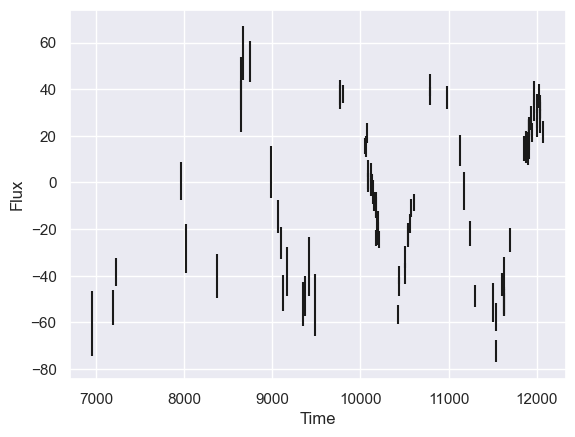

In [44]:
# YOUR CODE HERE
plt.errorbar(t,rv,rv_err,ls='none',c='k')
plt.xlabel('Time')
plt.ylabel('Flux')



### The Model

The first important step is to define a mathematical (and computational) model of how the parameters of interest are reflected in our observations.

Some references relating to what we're going to compute below:

- Balan 2009: http://adsabs.harvard.edu/abs/2009MNRAS.394.1936B
- Exofit Manual: http://www.star.ucl.ac.uk/~lahav/ExoFitv2.pdf
- Hou 2014: http://arxiv.org/pdf/1401.6128.pdf

The equation for radial velocity is this:

$$
v(t) = V - K[ \sin(f + \omega) + e \sin(\omega)]
$$

where $V$ is the overall velocity of the system, and

$$
K = \frac{m_p}{m_s + m_p} \frac{2\pi}{T}\frac{a \sin i}{\sqrt{1 - e^2}}
$$

The true anomaly $f$ satisfies

$$
\cos(f) = \frac{\cos(E) - e}{1 - e\cos E}
$$

Rearranging this we can write
$$
f = 2 \cdot{\rm atan2}\left(\sqrt{1 + e}\sin(E/2), \sqrt{1 - e} \cos(E/2)\right)
$$

The eccentric anomaly $E$ satisfies
$$
M = E - e\sin E
$$

and the mean anomaly is
$$
M = \frac{2\pi}{T}(t + \tau)
$$

and $\tau$ is the time of pericenter passage, which we'll parametrize with the parameter $\chi = \tau /  T$

These are the parameters needed to compute the radial velocity:

- $T$: orbital period
- $K$: amplitude of RV oscillation
- $V$: secular offset of RV oscillation
- $e$: eccentricity
- $\omega$: longitude of periastron
- $\chi$: dimensionless phase offset

Additionally, we will fit a scatter parameter $s$ which accounts for global data errors not reflected in the reported uncertainties (this is very similar to the third parameter from the linear fit we saw earlier)

For convenience, we'll store these parameters in a ``namedtuple``:

In [45]:
# RUN THIS
params = namedtuple('params', ['T', 'e', 'K', 'V', 'omega', 'chi', 's'])

### These just define the model we wrote down

In [62]:
# RUN THIS

@np.vectorize
def compute_E(M, e):
    """Solve Kepler's eqns for eccentric anomaly given mean anomaly"""
    f = lambda E, M=M, e=e: E - e * np.sin(E) - M
    return optimize.brentq(f, 0, 2 * np.pi)


def radial_velocity(t, theta):
    """Compute radial velocity given orbital parameters"""
    T, e, K, V, omega, chi = theta[:6]
    
    # compute mean anomaly (0 <= M < 2pi)
    M = np.mod(2*np.pi/T*(t+chi*T),np.pi*2)
    
    # solve for eccentric anomaly
    E = compute_E(M, e)
    
    # compute true anomaly
    f = 2*(np.arctan2(np.sqrt(1+e)*np.sin(E/2),np.sqrt(1-e)*np.cos(E/2)))**2
    
    # compute radial velocity
    return V - K*(np.sin(f+omega)+e*np.sin(omega))

### The Likelihood and Priors

In [70]:
# RUN THIS

theta_lim = params(T=(0.2, 2000),
                   e=(0, 1),
                   K=(0.01, 2000),
                   V=(-2000, 2000),
                   omega=(0, 2 * np.pi),
                   chi=(0, 1),
                   s=(0.001, 100))
theta_min, theta_max = map(np.array, zip(*theta_lim))

def log_prior(theta):
    if np.any(theta < theta_min) or np.any(theta > theta_max):
        return -np.inf # log(0)
    
    # Jeffreys Prior on T, K, and s
    return -np.sum(np.log(np.array(theta)[[0, 2, 6]]))

def log_likelihood(theta, t, rv, rv_err):
    sq_err = rv_err ** 2 + np.array(theta)[6] ** 2
    rv_model = radial_velocity(t, theta)
    return -0.5 * np.sum(np.log(sq_err) + (rv - rv_model) ** 2 / sq_err)

def log_posterior(theta, t, rv, rv_err):
    ln_prior = log_prior(theta)
    if np.isinf(ln_prior):
        return ln_prior
    else:
        return ln_prior + log_likelihood(theta, t, rv, rv_err)
    
def make_starting_guess(t, rv, rv_err):
    model = LombScargleFast()
    model.optimizer.set(period_range=theta_lim.T,
                        quiet=True)
    model.fit(t, rv, rv_err)

    rv_range = 0.5 * (np.max(rv) - np.min(rv))
    rv_center = np.mean(rv)
    return params(T=model.best_period,
                  e=0.1,
                  K=rv_range,
                  V=rv_center,
                  omega=np.pi,
                  chi=0.5,
                  s=rv_err.mean())

###  Now use my initial guess and sample the model

In [73]:
theta_guess = make_starting_guess(t, rv, rv_err)
theta_guess

ndim = len(theta_guess)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers

# start with a tight distribution of theta around the initial guess
rng = np.random.RandomState(42)
starting_guesses = theta_guess * (1 + 0.1 * rng.randn(nwalkers, ndim))

# RUN MCMC - YOUR CODE HERE
sampler = emcee.EnsembleSampler(nwalkers,ndim,log_posterior,args=(t, rv, rv_err))
pos, prob, state = sampler.run_mcmc(starting_guesses,10000,skip_initial_state_check=True)

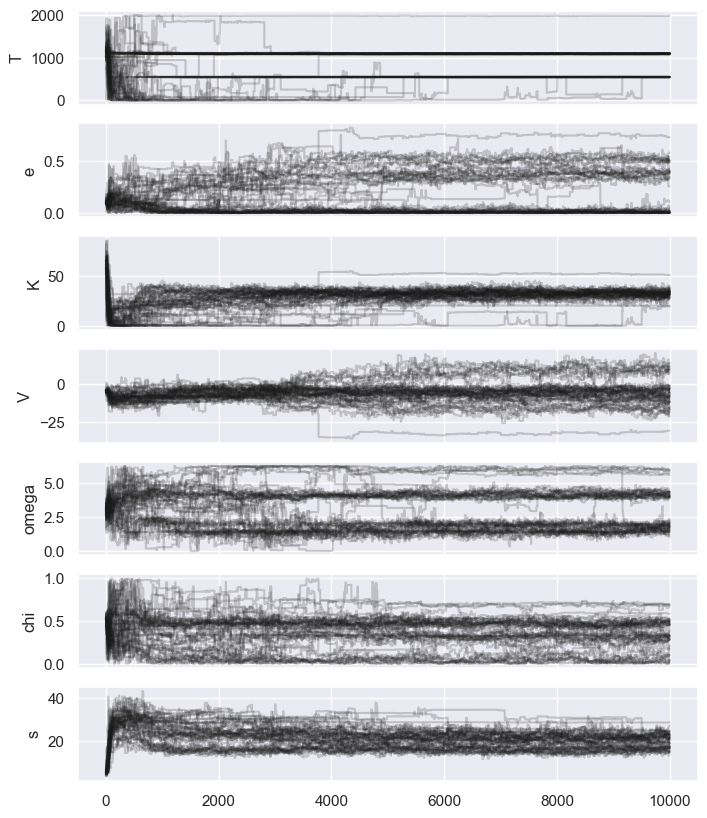

In [74]:
# This is a little function to plot the chains
def plot_chains(sampler):
    fig, ax = plt.subplots(ndim, figsize=(8, 10), sharex=True)
    for i in range(ndim):
        ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
        ax[i].set_ylabel(params._fields[i])

        
# PLOT YOUR CHAINS - YOUR CODE HERE
plot_chains(sampler)

## As we've seen before the initial steps in the chain aren't useful samples and it takes a while to reach a stationary distribution. Notice though that the chains are *NOT* all mixed - there are some that are wandering away from the the remaining traces, and being stubborn about it.

In [ ]:
# RUN A FULL MCMC HERE RESETING THE SAMPLER AND RESTARTING FROM THE LAST POSITION AFTER THE BURN-IN
# YOUR CODE HERE

In [ ]:
# PLOT YOUR CHAINS AGAIN - YOUR CODE HERE

In [ ]:
# AND LOOK AT THE PERIOD AND ECCENTRICITY 
# WE CAN'T GET MASSES FROM THE RADIAL VELOCITY METHOD, 
# BUT IF WE CARE ABOUT HABITABILITY, LOOKING AT e IS A GOOD IDEA
# Use corner.py or similar to look at the histograms
corner.corner(sampler.flatchain[:, :2], labels=params._fields[:2]);

In [ ]:
#RUN THIS TO VISUALIZE THE MODEL AGREEMENT WITH THE DATA
t_fit = np.linspace(t.min(), t.max(), 1000)
rv_fit = [radial_velocity(t_fit, sampler.flatchain[i])
          for i in rng.choice(sampler.flatchain.shape[0], 200)]

plt.figure(figsize=(14, 6))
plt.errorbar(t, rv, rv_err, fmt='.k')
plt.plot(t_fit, np.transpose(rv_fit), '-k', alpha=0.01)
plt.xlabel('time (days)')
plt.ylabel('radial velocity (km/s)');

In [ ]:
# RUN THIS TO GET A SENSE OF THE PERIOD AND ECCENTRICITY
mean = sampler.flatchain.mean(0)
std = sampler.flatchain.std(0)

print("Period       = {0:.0f} +/- {1:.0f} days".format(mean[0], std[0]))
print("eccentricity = {0:.2f} +/- {1:.2f}".format(mean[1], std[1]))